<img src= "Images/DY_LOGO_BLACK.png">

<h1><center>Creative Asset Optimization Model</center></h1>

<a id='top'></a>
<h3>Purpose statement:</h3><br>

<center>Gather insights on creative assets using machine learning techniques to gauge digital media impact on business. Machine learning techniques include Optical Character Regonition (neural network), feature importance (random forest), KPI trends (regression), and distributed lag model (timeseries correlation coefficient).</center>

<h3>Contents:</h3>
<ul>
    <li><h4><a href='#section1'>Ad content (text analysis)</a></h4></li>
    <ul>
        <li><a href='#sub1'>OCR model</a></li>
        <li><a href='#sub2'>Creative text classifications</a></li>
        <li><a href='#sub3'>Creative Message Analysis</a></li>
    </ul>
    <li><h4><a href='#section2'>Ad visual assets (Google Oculi Project)</a></h4></li>
    <ul>
        <li><a href='#sub4'>visual asset detection</a></li>
        <li><a href='#sub5'>Visual asset analysis</a></li>
        <li><a href='#sub6'>Final Creative mapping Table</a></li>
    </ul>
    <li><h4><a href='#section3'>Data cleaning</a></h4></li>
    <ul>
        <li><a href='#sub7'>Raw data by placement ID & creative ID</a></li>
        <li><a href='#sub8'>Media and creative variable integration (joins on placement ID & creative ID)</a></li>
    </ul>
    <li><h4><a href='#section4'>Random forest feature importance</a></h4></li>
    <ul>
        <li><a href='#sub9'>Model by KPI to determine value of assets (creative and media) for each KPI</a></li>
        <li><a href='#sub10'>Feature selection - significant variable insights</a></li>
    </ul>
    <li><h4><a href='#section5'>KPI trends (scatter plot with trend lines)</a></h4></li>
    <ul>
        <li><a href='#sub11'>Dynamic scatter plot (regression trend lines)</a></li>
        <li><a href='#sub12'>KPI trend insights</a></li>
    </ul>
    <li><h4><a href='#section6'>Distributed lag time model</a></h4></li>
    <ul>
        <li><a href='#sub13'>Lag Time Visualizations</a></li>
        <li><a href='#sub14'>Lag time insights</a></li>
    </ul>
</ul>

___
<a id='section1'></a>
<h2><center>Creative Classification Methodology - Text</center></h2>

To streamline ad classification process Optical Character Recognition (OCR) was used to scrape text from digital creatives. Today OCR is widley used to gather information from printed paper documents such as passports, invoices, and checks. We applied the same methodology to digital ads resulting in a relatively accurate extraction of the creative message. Once text is extracted we will be able use creative map to map back creative message attributes to account performance. 
    To show how this process works sample script (pytesseract = OCR library) along with a few creative examples have been provided below. Creative image dropdown selection will result in displayed image and text extraction below (*text will usually show about 10 seconds after*).

<a id='sub1'></a>
<b>OCR script:</b>

In [8]:
###OCR Code Sample###
#first upload required libraries
import pytesseract
import os, cv2
from IPython.display import Image
from ipywidgets import interact, interact_manual

def image_ocr(image_path):
    #guide tesseract command (OCR - Optical Character Recognition) & read image as monochromatic
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract'
    img = cv2.imread(image_path, 0)

    #capture dimensions of image & establish counter at 0 (j)
    height, width = img.shape
    total_area = height * width

    #dynamic image resize (ideal to have larger but not that large)
    if total_area < 100000:
        temp_img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    else:
        temp_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    #grayscale thresholds that will create binary image (black & white)
    ret, temp_img = cv2.threshold(temp_img,150,255,cv2.THRESH_TOZERO)

    #extract text from image using pytesseract library
    text = pytesseract.image_to_string(temp_img, lang='eng')
    return text.replace('\n', ' ').replace('  ', ' ')

#pywidget interactive dropdown (with image file names)
@interact
def show_images(file=os.listdir('images/creatives/')):
    display(Image('images/creatives/'+file))
    return image_ocr('images/creatives/'+file)

interactive(children=(Dropdown(description='file', options=('HTML_IMAGE_107783967.jpg', 'HTML_IMAGE_107822776.…

<a id='sub2'></a>

Text assets uploaded into creative mapping table (by creative ID) including raw OCR, creative message (QAed OCR), and CTA (found within creative message). 
<br>
<img src = "images/DY_Creative.jpg" align="right" width="200">
<br>
<b>Text classifications sample:</b>
<table align=left>
  <tr>
    <th><center>Creative ID</center></th>
    <th><center>Raw OCR</center></th>
    <th><center>Creative Message</center></th>
    <th><center>CTA</center></th>
  </tr>
  <tr>
    <td><center>111469719</center></td>
    <td><center>DAVID YURMANN SHOP GIFTS</center></td>
    <td><center>DAVID YURMAN SHOP GIFTS</center></td>
    <td><center>SHOP GIFTS</center></td>
  </tr>
    <tr>
    <td><center>106581689</center></td>
    <td><center>DAVID YUR MAN SHOP NOW</center></td>
    <td><center>DAVID YURMAN SHOP NOW</center></td>
    <td><center>SHOP NOW</center></td>
  </tr>
    <tr bgcolor="#ffff66">
    <td><center>112556074</center></td>
    <td><center>DAVID YURMAN   EXPLORE MORE</center></td>
    <td><center>DAVID YURMAN EXPLORE MORE</center></td>
    <td><center>EXPLORE MORE</center></td>
  </tr>
    <tr>
    <td><center>108064307</center></td>
    <td><center>DAVID YURMAN DISCOVER WEDDING</center></td>
    <td><center>DAVID YURMAN DISCOVER WEDDING</center></td>
    <td><center>DISCOVER WEDDING</center></td>
  </tr>
</table>

<h3>Wordclouds - Creative Message Text Analysis:</h3>
<a id='sub3'></a>

In [10]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image as Im
import matplotlib.pyplot as plt
%matplotlib inline

@interact
def show_images(baseline=os.listdir('images/wordclouds/'), comparison=os.listdir('images/wordclouds/')):
    fig, ax = plt.subplots(1, 2, figsize=[15,10])
    
    pil_im = Im.open('images/wordclouds/'+baseline)
    plt.subplot(1,2, 1)
    plt.axis('off')
    plt.title(baseline.replace('.png', ''), fontsize='xx-large')
    plt.imshow(np.asarray(pil_im))
    
    pil_im2 = Im.open('images/wordclouds/'+comparison)
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title(comparison.replace('.png',''), fontsize='xx-large')
    plt.imshow(np.asarray(pil_im2))

interactive(children=(Dropdown(description='baseline', options=('CTR Holiday.png', 'CTR.png', 'CTR_Holiday_201…

<img src="Images/wordcloud_legend_v4.png" align="center">

__Wordcloud Insights:__
+ Wordclouds were evaluated using CTR, Universal Landing Page CVR (ULP) and sale CVR (CVR).
+ Size of words within wordcloud represent the frequency of word the word while color is factored by KPI performance (i.e. high CTR will be green)
+ Insights will focus on CTR for consideration/awareness KPI and CVR for low funnel intent (how well ad resonates with viewer)
    + CTR vs Holiday CTR:
        + During the holiday period the word 'holiday' appeared more often (note larger than holistic CTR wordcloud) and performed well at that time (green CTR)
        + The word 'now' does better year round than during the holiday season, instead of 'shop now' CTA should consider using 'shop gifts'
        + Location based words did poorly during the holiday period in comparison to whole year round (i.e. 'boston', 'chicago', 'locator', etc.)
        + CTR performance from word 'explore' not strong (later we will see brand segment does better with 'explore')
    + CVR vs Holiday CVR:
        + Urgency 'now' word performed poorly across CVR (holisitic) and CVR holiday wordclouds. This is most likely due to viewers taking time before making sale conversion, as such it is best to have creative messages 
        + Word 'shop' did well across both CVR Holiday and CVR (holisitic) wordclouds but had stronger performance during holiday period suggesting viewers are more likely to convert on a shop focused ad during holiday period
        + Contrary to CTR, most city names did relatively well across both CVR wordclouds, with high performance from words such as 'Chicago', 'Boston', and 'Michigan'.
            + Some locations did not perform as well such as Austin, Huntington or Atlanta (Lenox Square during holiday). Metro areas in Northeast and northern Midwest drove conversion performance.
    + CVR brand vs CVR Performance:
        + CVR brand wordcloud has far more words than CVR performance since brand campaigns creatives are catered to a specific time of year while performance is live year round (more generic).
        + Similar to CVR holiday and CVR (holistic) 'shop' did well while 'now' did poorly.
        + The word 'gifts' did well across both wordclouds but appeared more often (larger word) for brand campaigns, as to be expected since brand campaigns launch during gift giving periods.
        + Brand wedding creatives did not perform well while performance wedding creatives did fair.
            + Consider keeping wedding creatives solely for performance campaigns

<a href='#top'>Top of Page</a>

___
<a id='section2'></a>
<h2><center>Creative Classification Methodology - Visuals</center></h2>

<img src = "images/DY_Visual_Assets_Example.jpg" align=right width=400>

<a id='sub4'></a>
Similar to text, visual assets need to be classified for every creative. Visual asset portion of image recognition will not be done in-house but instead will use Google Oculi's (based off Vision API) to streamline classification process of all historical creatives. Image detection software encompasses a large net that m/SIX will later need to QA and transform into helpful ad information. __An example of raw visual asset transformation can be seen here with creative id 108921862 that Google Oculi classified as Ring, Fashion accessory, Jewellery__. Later on our team would QA and format classifications as (*image on right*):
+ Theme = Product
+ Product = Ring
+ Product Count = 6
+ Product material = Gold, Black titanium, Carbon
+ Person = No
+ Background Color = Gray
+ Creative Audience = Men & Geographic-Atlanta

__Top Line Visual Asset Analysis:__
<a id='sub5'></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#read clean data (will show clean process after)
kpi_df = pd.read_csv('Data for charts/kpi_analysis_data.csv')
kpi_df = kpi_df.dropna(subset=['Theme','Campaign_Type'])
kpi_df = kpi_df[kpi_df['Theme'] != 'Other']

#create quarter column
kpi_df['Week'] = pd.to_datetime(kpi_df['Week'], format='%m/%d/%Y')
kpi_df = kpi_df[kpi_df['Week']>='2018-01-01']
kpi_df['Quarter'] = pd.PeriodIndex(kpi_df['Week'], freq='Q').astype(str)
q_list = list(kpi_df['Quarter'].unique())[:-1]
q_list.insert(0,'ALL')

#make group classifications for the material of products
kpi_df.loc[(kpi_df['Material'].str.contains('Gold, Silver')) | (kpi_df['Material'].str.contains('Silver, Gold')), 'Material'] = 'Silver & Gold'
kpi_df['Material Group'] = kpi_df['Material'].str.split(', ').str.get(0)
kpi_df.loc[(kpi_df['Material Group'].isin(['Beads', 'Aluminum', 'Turquoise'])), 'Material Group'] = 'Other'
kpi_df.loc[(kpi_df['Material Group'].isin(['Stainless Steel', 'Stainless Steal'])), 'Material Group'] = 'Stainless Steel'
kpi_df.loc[(kpi_df['Material Group'].isin(['Silver', 'Sterling silver', 'Sterling Silver'])), 'Material Group'] = 'Silver'
kpi_df = kpi_df.dropna(subset=['Material Group'])

kpi_df['Product Group'] = kpi_df['Product'].str.split(', ').str.get(0)
kpi_df.loc[(kpi_df['Product Group'].isin(['Cuff', 'Pen', 'Chain', 'Cuffs'])), 'Product Group'] = 'Other'
p_list = list(kpi_df['Product Group'].unique())
p_list.insert(0,'ALL')

#interactive dropdow
@interact
def bar_chart(segment=['Overall', 'Product vs Lifestyle', 'Performance vs Brand'], quarter=q_list, kpi=['CTR', 'ULP', 'IVR', 'CVR'], product=p_list, labels=['Product', 'Material Group', 'Product_Count', 'Background_Color']):   
    #break up into two side by side charts
    mpl.style.use('seaborn')
    plots = 1 if segment == 'Overall' else 2
    fig,ax=plt.subplots(1, plots, figsize=[15,8])
    
    #dynamic kpi metrics & subsets
    scale = 'Visits' if kpi=='IVR' else 'Imp'
    y_label = 'Visits' if kpi=='IVR' else 'Impressions'
    if kpi=='IVR':
        kpi_g='I_Visits'
    elif kpi=='CTR':
        kpi_g='Clicks' 
    elif kpi=='ULP':
        kpi_g='LP_Conversions'
    else:
        kpi_g='Revenue'
    subset = ['Product', 'Lifestyle'] if segment == 'Product vs Lifestyle' else ['Performance', 'Brand']
    s_filter = 'Theme' if segment == 'Product vs Lifestyle' else 'Campaign_Type'
    
    #calc kpi across overall dataframe & find quantiles (for color effieciency later)
    kpi_df[kpi] = kpi_df[kpi_g]/kpi_df[scale]
    df = kpi_df[(kpi_df[scale] > 0) & (kpi_df[kpi_g] > 0)]
    df = df.replace(np.inf, np.nan)
    df = df.dropna(subset=[kpi])
    df = df if quarter == 'ALL' else df[df['Quarter']==quarter]
    df = df if product == 'ALL' else df[df['Product Group']==product]
    thresholds = df[kpi].quantile([.15,.45,.65, .75]).values

    #break up dataframe into two parts (one for each plot) and filter on quarter
    plot_df1 = df[df[s_filter]==subset[0]] if segment != 'Overall' else df
    plot_df2 = df[df[s_filter]==subset[1]] if segment != 'Overall' else None
    
    #group by xlabel for bar chart
    plot1_data = plot_df1.groupby([labels])[[scale,kpi_g]].sum().reset_index()
    plot2_data = plot_df2.groupby([labels])[[scale,kpi_g]].sum().reset_index() if segment != 'Overall' else None
    
    #calc kpi fields
    plot1_data[kpi] = plot1_data[kpi_g]/plot1_data[scale]
    if segment != 'Overall':
        plot2_data[kpi] = plot2_data[kpi_g]/plot2_data[scale]
    
    #convert dataframe to nested arrays (for visuals)
    plot1_values = plot1_data[scale].values
    plot1_labels = plot1_data[labels].values
    plot1_kpi = plot1_data[kpi].values
    
    if segment != 'Overall':
        plot2_values = plot2_data[scale].values
        plot2_labels = plot2_data[labels].values
        plot2_kpi = plot2_data[kpi].values
    
    #set up color map for two charts
    plot1_colors = []
    plot2_colors = []
    
    #input colors for first plot
    for i in range(0, len(plot1_kpi)):
        if plot1_kpi[i] <= thresholds[0]:
            plot1_colors.append('red')
        elif plot1_kpi[i] > thresholds[0] and plot1_kpi[i] <= thresholds[1]:
            plot1_colors.append('lightcoral')
        elif plot1_kpi[i] > thresholds[1] and plot1_kpi[i] <= thresholds[2]:
            plot1_colors.append('lightgreen')
        elif plot1_kpi[i] > thresholds[2] and plot1_kpi[i] <= thresholds[3]:
            plot1_colors.append('lime')
        else:
            plot1_colors.append('green')

    #input colors for second plot
    if segment != 'Overall':
        for i in range(0, len(plot2_kpi)):
            if plot2_kpi[i] <= thresholds[0]:
                plot2_colors.append('red')
            elif plot2_kpi[i] > thresholds[0] and plot2_kpi[i] <= thresholds[1]:
                plot2_colors.append('lightcoral')
            elif plot2_kpi[i] > thresholds[1] and plot2_kpi[i] <= thresholds[2]:
                plot2_colors.append('lightgreen')
            elif plot2_kpi[i] > thresholds[2] and plot2_kpi[i] <= thresholds[3]:
                plot2_colors.append('lime')
            else:
                plot2_colors.append('green')
            
    #create first plot 
    plt.subplot(1,2, 1)
    title_1 = 'DY Digital '+subset[0]+': '+kpi if segment != 'Overall' else 'Overall DY Digital: '+kpi
    plt.title(title_1, family='serif', fontsize='xx-large')
    plt.ylabel(y_label, family='serif', fontsize='x-large')
    plt.bar(range(0, len(plot1_values)), plot1_values, color=plot1_colors, align='center')
    plt.xticks(range(0, len(plot1_labels)), plot1_labels, rotation=90, family='serif',fontsize='large')
    plt.tight_layout()
    
    #second plot
    if segment != 'Overall': 
        plt.subplot(1,2, 2)
        plt.title('DY Digital '+subset[1]+': '+kpi, family='serif', fontsize='xx-large')
        plt.ylabel(y_label, family='serif', fontsize='x-large')
        plt.bar(range(0, len(plot2_values)), plot2_values, color=plot2_colors, align='center')
        plt.xticks(range(0, len(plot2_labels)), plot2_labels, rotation=90, family='serif',fontsize='large')
        plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='segment', options=('Overall', 'Product vs Lifestyle', 'Performance…

__Visual Asset Insights:__
+ __Overall:__
    + Ring, necklace and bracelet products had majority of investment/impressions from Q1 2018 - Q1 2019. During this timeframe creatives that focused on specific product, did not have multiple kinds of product in ad, did better overall. Not to be confused with product count which counts how many products are in the ad.
    + Top performing product materials (from Q1 2018 - Q1 2019) included gold, gold & silver (together in one ad), and stainless steel. This continues to be the case when isolating to Q1 2019 with the exception of little to no ads containing stainless steel.
        + Stainless steel has proven to be the one of the best creative product materials in terms of sale conversions. This lower costing material could be used to serve younger prospecting audience and helps add contrast to DAVID YURMAN product portfolio. Meanwhile, ads with solely gold and both silver & gold should be kept to serve high spending audience.
    + Off black and off white background colors tend to do better than bright/hard colors such as green, pink, and light blue.
        + Background color performance is most likely a result of how well an ad can be read by the viewer (readability).
    + Optimal product count is dependent on the product within the creative. While rings appear to have greater flexibility to higher count (1-5) products such as necklace tend to provide better results at lower range (1-3).
        + Varying optimal product count most likely due to ad clutter which aligns with readability of ad. So ring ads can have higher number of products since products don't take up much space in ad while necklace takes up more space and cannot have as many products within one creative. 
+ __Product vs Lifestyle:__
    + Segmentation based on whether a creative is product focus or lifestyle (lifestyle = people in the ad wearing DY products).
    + Product focus creatives take up greater share of investment over lifestyle (y-axis scale are significantly different). In addition, product segment ads tend to perform better than lifestyle (KPI efficiency higher for product segement).
    + __CTR kpi:__
        + Product segment outperformed lifestyle segment (lifestyle had more red bars) even though there were far less lifestyle ads. 
        + Top products:
            + Product segment - bracelet, necklace, and ring. Product ads do better when focused on one product.
            + Lifestyle segment - bracelet & ring (mulitple products within a creative) and necklace & bracelet (within one creative). Lifestyle ads tend to do better with mulitple kinds of products that contain bracelet in the mix.
        + Top product materials:
            + Stainless steel top performing material across both segments but stainless steel also has low volume of impressions (investment). Hard to judge if material will scale well based on historical performance.
            + Product segment - outside of stainless steel; titanium, gold, and silver & gold (within one ad) all had decent CTR.
        + Product count was primarily based on product segment performance which is reflected in top line insights (__Overall__).
        + Lifestyle creatives had a notable large share of color creatives such as blue/light blue, green, and black which did poorly in comparison to tan/yellow/light brown (off white creatives).
            + Possible lifestyle creatives performance was in part effected by background color of creative. Should consider changing majority of lifestyle ads background color to off white.
    + __CVR kpi:__
        + Similar to CTR, product segment outperformed lifestyle (more red) but product segment had the best performing product group (ring & necklace in same ad) but low impression volume.
        + Top products:
            + Product segment - better when focused on one of the following bracelet, necklace, and ring (similar to CTR).
            + Lifestyle segment - contrary to CTR bracelet alongside another product was not the ideal creative combo for sale conversions. Under conversion KPI the opposite became true as bracelet combos saw a drop in performance which could be in part due to impression levels of necklace + ring ad (which was far lower than bracelets).
        + Product materials callouts:
            + Product segment reflected overall performance (mentioned above) while lifestyle segment had little to no influence over sale conversions.
        + Creative background color effectiveness aligned with CTR performance. Lifestyle had levels of bright/hard colors that had poor conversions levels while black did well.
            + As mentioned prior, should consider shifting lifestyle ads to having bright colors to having off white or off black colors.
+ __Performance vs Brand:__
    + Segmentation based on the media campaign type. Campaigns can fall under performance segment which are live throughout the year or brand which are specific to major gift giving periods (i.e. Valentine's Day, Mother's Day, Holiday season, etc.).
    + Just like product segment typically outperforms lifestyle segment, performance segment typically outperforms brand segment's mid-lower funnel conversions. However unlike lifestyle, brand investment scale is comparable to performance and actually has an overall better CTR (awareness based KPI) than performance segment.
        + Campaign type effectiveness is purely direct attribution and does not consider cross attribution of one campaign type into the other (i.e. how brand investment effects performance conversions). This concept will be explored further in lag time analysis.
    + __CTR kpi:__
        + Overall brand segment had better CTR than performance segment. However, performance segment did outshine brand in specific areas such as necklace products and stainless steel product material.
        + Product callouts:
            + Necklace and bracelet (one product type per creative) did well across both segments.
            + Performance segment - necklace was top performing product (outperformed all brand CTR).
            + Brand segment - ring had the largest volume of impressions for both segment but only brand segment had an effective CTR (light green).
        + Product materials callouts:
            + Gold and titanium product materials did well across both segments.
            + Performance segment - stainless steel (solely) and silver & gold (together) did well in terms of CTR. This reflects holistic CTR efficiency.
            + Brand segment - silver CTR did well but saw efficiency drop off by the lower funnel (CVR).
        + Product count was most efficient within a range of 1-4 across both segments. Type of product was a factor to effective product count, examples such as:
            + Ring and bracelet had a more flexible range of top performing product count.
            + Necklace had top performance at 2 count (with scaling) for performance segment.
    + __CVR kpi:__
        + Efficiency significantly shifts from CTR to CVR (upper to lower). Initially brand segment was slightly more efficient for CTR but is completely dominated by performance segment in lower funnel CVR.
        + Product callouts:
            + Exclusively performance segment, necklace was top performing product within an ad, followed by bracelet and ring.
        + Product material callouts:
            + Exclusively performance segment, stainless steel was top product material, followed by gold and gold & silver (together).
        + Product count callouts:
            + Performance segment - tend to do better with high product count (>=2). Effectiveness tied back to specific product types:
                + Ring and necklace drove high CVR when product count was greater than or equal to 2.
            + Brand segment - did better with a low product count of 1. Also tied back to product types:
                + Ring drove high CVR with low product count of 1. Difference in product count performance might tie back to creative message, which tends to be longer for brand segment than performance segment since performance segment has a more generic message while brand is specific to an audience/time of year.
            


<a href='#top'>Top of Page</a>
___
<a id='sub6'></a>
<h3><center>Creative Mapping Table Output (Text & Visuals)</center></h3>

__Finalized creative map below (with interactive creative id slider):__

In [9]:
#python script to upload excel file and print (with pandas)
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#read file using pandas
cmap_df = pd.read_csv('Mapping Tables/DY_Creative_Map.csv')

@interact
def show_articles_more_than(column='creative_id', x=(70000000, 114801713, 1)):
    return cmap_df.loc[cmap_df[column] > x]

interactive(children=(Text(value='creative_id', description='column'), IntSlider(value=92400856, description='…

___
<a id='section3'></a>
<h2><center>David Yurman - Performance Data (1/2017 - 4/2019)</center></h2>

<img src = "Images/join_datasets.png" align = "right"> Next performance data must be cleaned and joined back to creative classifications so KPI performance can be tied back to creative assets. A few things to keep top of mind for interpreting performance:
+ Identify KPIs (such as CTR, site visits, and digital conversions)
+ Data will need to be aggregated so it can be used to derive business insights
+ Will need some sort of time series for seasonality
+ Identify a way to join creative map to performance data (creative id/key)

<a id='sub7'></a>
__Sample of performance dataset__:

In [37]:
#import pandas to upload excel
import pandas as pd

#read and print DY performance dataframe (export from Datorama)
dy_df = pd.read_csv('Data for charts/Performance by Day (Sample).csv')
dy_df.head(5)

,Day,Media Buy Key,Media Buy Name,Creative Key,Creative Name,Planned Spend Creative Daily,Cross Channel Impressions,Cross Channel Clicks,Visits,Interested Visits,Total Orders,m_Revenue
0,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76602700,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v1,0.0,0,0,0,0,0,0.0
1,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76599975,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v2,0.0,0,0,0,0,0,0.0
2,1/1/2017,10942595,PCKXGD_DAV_WED_101_Audience_XAXIS_DMT_1 x 1_pe...,76597882,DavidYurman_15sec_FINAL_compressed (2) v2,0.0,0,0,0,0,1,395.0
3,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76598878,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v1,0.0,0,0,0,0,0,0.0
4,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76597883,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v2,0.0,0,0,0,0,1,325.0


<a id='sub8'></a>
__Join Creative Map to Performance dataset:__

In [16]:
#read creative map
cmap = pd.read_csv('Mapping Tables/DY_Creative_Map.csv')

#prep join (make sure datatypes are aligned)
dy_df['Creative Key'] = dy_df['Creative Key'].astype(str)
cmap['creative_id'] = cmap['creative_id'].astype(str)

#join previous creative map to previous performance data
dy_df_creative = pd.merge(dy_df,
                         cmap[['creative_id', 'Background_Color', 'Product']],
                         left_on='Creative Key',
                         right_on='creative_id',
                         how='left')

#performance data with creative classifications
dy_df_creative.head(5)

,Day,Media Buy Key,Media Buy Name,Creative Key,Creative Name,Planned Spend Creative Daily,Cross Channel Impressions,Cross Channel Clicks,Visits,Interested Visits,Total Orders,m_Revenue,creative_id,Background_Color,Product
0,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76602700,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v1,0.0,0,0,0,0,0,0.0,76602700,White,Ring
1,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76599975,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v2,0.0,0,0,0,0,0,0.0,76599975,White,Ring
2,1/1/2017,10942595,PCKXGD_DAV_WED_101_Audience_XAXIS_DMT_1 x 1_pe...,76597882,DavidYurman_15sec_FINAL_compressed (2) v2,0.0,0,0,0,0,1,395.0,76597882,Black/White,Ring
3,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76598878,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v1,0.0,0,0,0,0,0,0.0,76598878,White,Ring
4,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76597883,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v2,0.0,0,0,0,0,1,325.0,76597883,White,Ring


**Above is just a sample that is meant to show how creative attributes were joined to performance data*

<a href='#top'>Top of Page</a>
___
<a id='section4'></a>
<h2><center>Random Forest Model - Feature Importance</center></h2>
<b>Purpose statement:</b> Isolate variables that have a strong relationship to KPI performance (CTR, IVR, CVR). An individual model will be created for each KPI so feature importance can be abstracted seperatly for each KPI.

<b>Model Description:</b>
As the name suggests random forests are a collection of trees (specifically decision trees) used to predict values. Due to transparency of random forest models, variable decisions can be used to make feature importance, it is easy to find which variables were larger contributors to the predicted values (KPI performance).
    
<b>Random Forest Model (script):</b>

In [31]:
#random forest model - part 1

#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
%matplotlib inline 

#import media data into dataframes (join to QSI dataset later)
dy_df = pd.read_csv('data for charts/dy_creative_feature_select.csv')

#index last x variable column (where y index starts)
ctr_index = len(dy_df.columns)-4
cvr_index = len(dy_df.columns)-3

#convert OCR accuracy in dataframe from float to integer
dy_df["OCR_Accuracy"] = round(dy_df["OCR_Accuracy"] * 100, 0)
dy_df["OCR_Accuracy"] = dy_df["OCR_Accuracy"].astype(int)

# dy_df['Week'] = pd.to_datetime(dy_df['Week'], format='%m/%d/%Y')
# dy_df = dy_df[dy_df['Week'] >= '2018-12-30']

In [32]:
#random forest model - part 2

#take out na's from ivr and cpr (cvr) dataframes (seperate models)
dy_df = dy_df.replace(np.inf, np.nan)

dy_df_ivr = dy_df.dropna(subset=['IVR'])
dy_df_ivr = dy_df_ivr.reindex()

dy_df_cpr = dy_df.dropna(subset=['CPR'])
dy_df_cpr = dy_df_cpr.reindex()

#break up x variables in two parts (first part is categorical and second part is numeric)
x_ctr_p1 = dy_df.iloc[:, 0:13]
x_ctr_p2 = dy_df.iloc[:, 13:16]

x_ivr_p1 = dy_df_ivr.iloc[:, 0:13]
x_ivr_p2 = dy_df_ivr.iloc[:, 13:16]

x_cpr_p1 = dy_df_cpr.iloc[:, 0:13]
x_cpr_p2 = dy_df_cpr.iloc[:, 13:17]

#set x and y values for model (convert categorical to numeric with labelencoder model)
x_ctr = pd.concat([x_ctr_p1.apply(LabelEncoder().fit_transform), x_ctr_p2], axis=1).values
dy_df["CTR"] = round(dy_df["CTR"] * 10000, 0)
y_ctr = dy_df["CTR"].astype(int).values

x_ivr = pd.concat([x_ivr_p1.apply(LabelEncoder().fit_transform), x_ivr_p2], axis=1).values
dy_df_ivr["IVR"] = round(dy_df_ivr["IVR"] * 1000, 0)
y_ivr = dy_df_ivr["IVR"].astype(int).values

x_cpr = pd.concat([x_cpr_p1.apply(LabelEncoder().fit_transform), x_cpr_p2], axis=1).values
dy_df_cpr["CPR"] = round(dy_df_cpr["CPR"] * 10000, 0)
y_cpr = dy_df_cpr["CPR"].astype(int).values

#grab column names
feat_labels = dy_df.columns[0:ctr_index]
feat_labels_2 = dy_df_ivr.columns[0:cvr_index]

#split into test and train datasets (1.CTR   2.IVR   3.CPR)
x_ctr_tr, x_ctr_ts, y_ctr_tr, y_ctr_ts = train_test_split(x_ctr, y_ctr, test_size=0.1, random_state=0)
x_ivr_tr, x_ivr_ts, y_ivr_tr, y_ivr_ts = train_test_split(x_ivr, y_ivr, test_size=0.1, random_state=0)
x_cpr_tr, x_cpr_ts, y_cpr_tr, y_cpr_ts = train_test_split(x_cpr, y_cpr, test_size=0.1, random_state=0)

#create random forest object (3 models - CTR, IVR, CPR)
ctr_forest = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0, n_jobs=-1)
ctr_forest.fit(x_ctr_tr, y_ctr_tr)

ivr_forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
ivr_forest.fit(x_ivr_tr, y_ivr_tr)

cpr_forest = RandomForestRegressor(n_estimators=100, max_depth=22, random_state=0, n_jobs=-1)
cpr_forest.fit(x_cpr_tr, y_cpr_tr)

#grab important feature list from each model (deciding factors in random forest)
ctr_importances = ctr_forest.feature_importances_
ctr_indices = np.argsort(ctr_importances)[::-1]

ivr_importances = ivr_forest.feature_importances_
ivr_indices = np.argsort(ivr_importances)[::-1]

cpr_importances = cpr_forest.feature_importances_
cpr_indices = np.argsort(cpr_importances)[::-1]

#set up arrays where top results will append
ctr_labels = []
ctr_important = []

ivr_labels = []
ivr_important = []

cpr_labels = []
cpr_important = []

#append top important features (with labels)
for f in range(0,16):
    ctr_labels.append(feat_labels[ctr_indices[f]])
    ctr_important.append(ctr_importances[ctr_indices[f]])
    ivr_labels.append(feat_labels_2[ivr_indices[f]])
    ivr_important.append(ivr_importances[ivr_indices[f]])

for f in range(0,17):
    cpr_labels.append(feat_labels_2[cpr_indices[f]])
    cpr_important.append(cpr_importances[cpr_indices[f]])
    
#prediction values from random forest models
CTR_predict_test = ctr_forest.predict(x_ctr_ts)
IVR_predict_test = ivr_forest.predict(x_ivr_ts)
CPR_predict_test = cpr_forest.predict(x_cpr_ts)

CTR_predict_train = ctr_forest.predict(x_ctr_tr)
IVR_predict_train = ivr_forest.predict(x_ivr_tr)
CPR_predict_train = cpr_forest.predict(x_cpr_tr)

#find variance score (variance of actuals vs predicitons based on models)
variance_scores = []

variance_scores.append(explained_variance_score(y_ctr_tr, CTR_predict_train))
variance_scores.append(explained_variance_score(y_ctr_ts, CTR_predict_test))
variance_scores.append(explained_variance_score(y_ivr_tr, IVR_predict_train))
variance_scores.append(explained_variance_score(y_ivr_ts, IVR_predict_test))
variance_scores.append(explained_variance_score(y_cpr_tr, CPR_predict_train))
variance_scores.append(explained_variance_score(y_cpr_ts, CPR_predict_test))

#will input all variance scores into table
table_data = np.reshape(variance_scores, (3,2))

<a id='sub9'></a>
<b>Random Forest Model Visualizations (CTR, IVR, CVR):</b>

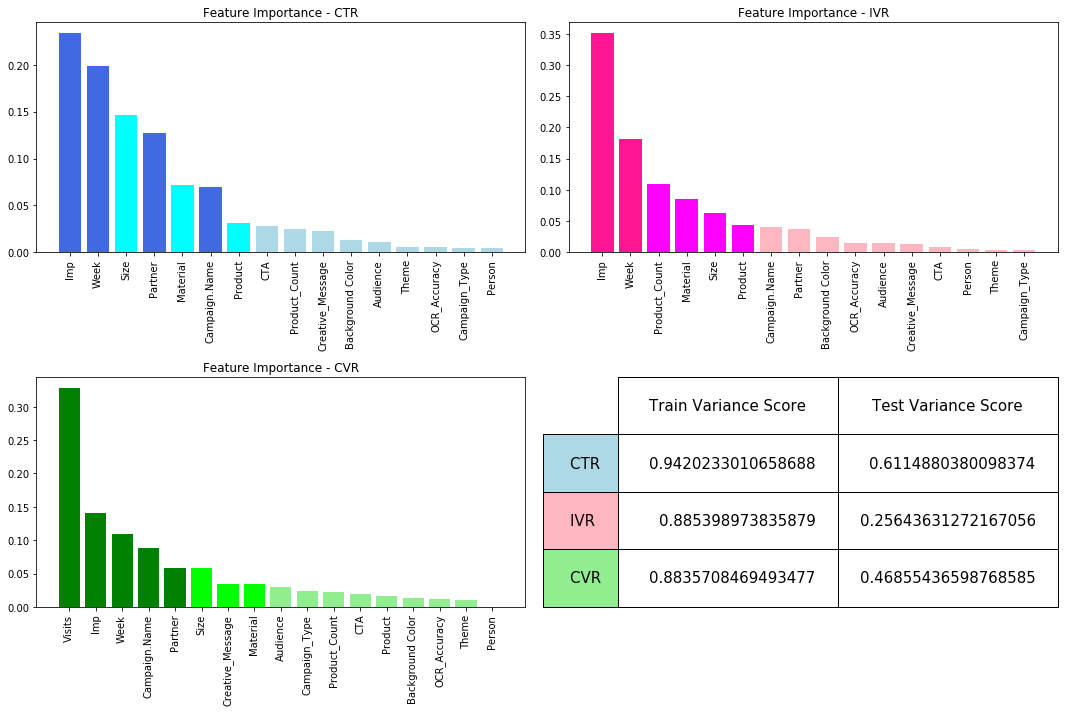

In [41]:
%matplotlib inline
#plot charts from feature importance analysis
fig,ax=plt.subplots(2, 2, figsize=[15,10])

#set up creative feature list and blank color maps
creative_features = ['Material', 'Product', 'CTA', 'Product_Count', 'Creative_Message', 'Background Color', 'Audience', 'Size']
ctr_colors = []
ivr_colors = []
cvr_colors = []

for i in range(0, len(ctr_important)):
    if ctr_important[i] > 0.03 and ctr_labels[i] in creative_features:
        ctr_colors.append('cyan')
    elif ctr_important[i] > 0.05 and ctr_labels not in creative_features:
        ctr_colors.append('royalblue')
    else:
        ctr_colors.append('lightblue')

plt.subplot(2,2, 1)
plt.title('Feature Importance - CTR')
plt.bar(range(0, 16), ctr_important, color=ctr_colors, align='center')
plt.xticks(range(0, 16), ctr_labels, rotation=90)
plt.tight_layout()


for i in range(0, len(ivr_important)):
    if ivr_important[i] > 0.03 and ivr_labels[i] in creative_features:
        ivr_colors.append('magenta')
    elif ivr_important[i] > 0.05 and ivr_labels not in creative_features:
        ivr_colors.append('deeppink')
    else:
        ivr_colors.append('lightpink')

plt.subplot(2,2, 2)
plt.title('Feature Importance - IVR')
plt.bar(range(0, 16), ivr_important, color=ivr_colors, align='center')
plt.xticks(range(0, 16), ivr_labels, rotation=90)
plt.tight_layout()

for i in range(0, len(cpr_important)):
    if cpr_important[i] > 0.03 and cpr_labels[i] in creative_features:
        cvr_colors.append('lime')
    elif cpr_important[i] > 0.05 and cpr_labels not in creative_features:
        cvr_colors.append('green')
    else:
        cvr_colors.append('lightgreen')

plt.subplot(2,2, 3)
plt.title('Feature Importance - CVR')
plt.bar(range(0, 17), cpr_important, color=cvr_colors, align='center')
plt.xticks(range(0, 17), cpr_labels, rotation=90)
plt.tight_layout()

plt.subplot(2,2, 4)
plt.title('')
plt.axis('off')
the_table = plt.table(cellText=table_data,
          rowLabels = ('    CTR ', '    IVR ', '    CVR '),
          rowColours=('lightblue', 'lightpink', 'lightgreen'),
          colLabels=('Train Variance Score', 'Test Variance Score',''),
         bbox = [0.1, 0, .9, 1])
the_table.set_fontsize(20)
plt.tight_layout()
plt.show()

<a id='sub10'></a>
__Chart Callouts:__
+ CTR bar chart (blue)
    + *Dark Blue = High value (not creative variable)*
    + *Cyan = High value (creative variable)*
    + *Light Blue = Low value*
+ IVR bar chart (pink)
    + *Dark Pink = High value (not creative variable)*
    + *Bright Pink = High value (creative variable)*
    + *Light Pink = Low value*
+ CVR bar chart (green)
    + *Dark Green = High value (not creative variable)*
    + *Bright Green = High value (creative variable)*
    + *Light green = Low value*
        
__Model - Feature Importance Insights:__
+ All models had accurate training variance scores with relatively low test scores, a sign of overfitted models (common amongst decision tree type models). While these models are not ideal for making future predictions they are still useful for assigning variable significance from past KPI performance.
+ The most important variables across all three models, CTR, IVR and CVR, were Impressions & Week (also Visits for CVR).
    + Impressions & Week variables were used to interpret the value of investment (impressions) and seasonality (week). These two factors suggest that how much and when to invest were priority for deciding KPI performance output. Since the feature importance for these two variables is the same across all models it makes sense to exclude any model/kpi specific insight (below).
+ CTR model (training score = .94):
    + Important features include creative size (i.e. 728x90), vendor (i.e. Xaxis, Google, etc.), product material (gold, diamond, silver, etc.), Campaign, and products (i.e. ring, bracelet, necklace, etc.). KPI important feature rationale:
        + Creative Size - larger dimensions have resulted in higher CTR, IVR, and CVR suggesting that a person will have a better chance of clicking and later converting based on size of ad.
        + Vendor (Partner) - majority of recent activity falls under Xaxis for digital. Historically this was not always the case and each vendor is meant to serve a specific purpose, for this reason KPI performance can vary based on which vendor/partner is chosen.
        + Product material - a descriptive feature of product which is useful in specifying product details that can be used to determine KPI performance. 
            + For example, necklace ads that have both silver and gold in an ad do better than ads that only have one.
        + Campaign - a media variable that meant to serve a specific media plan over a duration of time. These plans can be specific to holidays, evergreen campaigns, product collections, and even location. These factors are major contributors to KPI performance.
        + Products - the products that are found in the ad, such as ring, necklace, bracelet, earring, watch, and more. While rings control majority of activity the other products do contribute to all KPI outputs.
+ IVR model (training score = .89):
    + Important features include product count (number of products in ad), product material, creative size, products, and campaign. KPI important feature rationale (only additional features):
        + Product count - the number of products in a creative can decide on how well the ad performs. Similar to product material the product count is a descriptive feature of product that gives another level of detail for deciding KPI performance.
            + Product count can decide whether an ad feels empty (not enough products) or cluttered (too many products) which is important for readability or engagement of ad.
            + For example, necklace ads tend to have stronger performance with 2 necklaces while rings can have strong performance with a wider range of 2-6 rings, most likely due to how well multiple products fit.
+ CVR model (training score = .88):
    + Important features include campaign, vendor, creative size, creative message (text in ad), and product material. KPI important feature rationale (only additional features):
        + Creative message - the content of a creative is one of the deciding factors for CVR performance. How well the message resonates with the viewer is a major deciding factor for conversions.

<a href='#top'>Top of Page</a>

___
<a id='section5'></a>
<h2><center>KPI Analysis - Regression Trends</center></h2>

Key Performance Indicator (KPI) analysis will use trends from input (x) against output (y) that can be used to find patterns at various account segments such as Brand vs Performance. Regression trends, such as linear, will be based off numerous data points that are illustrated in scatter plot below. Colors will represent categories such as theme (product & lifestyle), campaign type (brand & performance) and creative audience (women, men, wedding, etc.).

<a id='sub11'></a>

In [11]:
from scipy import optimize, stats
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import warnings

#prep plotly offline and filter warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

#read and clean up dataframe from csv file
trend_df = pd.read_csv('Data for charts/kpi_analysis_data.csv')
trend_df = trend_df.dropna(subset=['Campaign_Type', 'Theme', 'Audience'])
trend_df = trend_df[trend_df['Theme'] != 'Other']
trend_df['Week'] = pd.to_datetime(trend_df['Week'], format='%m/%d/%Y')
trend_df = trend_df[trend_df['Week']>='2018-01-01']
trend_df['Quarter'] = pd.PeriodIndex(trend_df['Week'], freq='Q').astype(str)
q_list = list(trend_df['Quarter'].unique())[:-1]
q_list.insert(0,'ALL')

#clean up variable selection (i.e I_Visits=Interested Visits)
n_col = list(trend_df.select_dtypes('number').columns)
x_list = []
col_key = dict()
for i in n_col:
    x_list.append(str(i).replace('Imp', 'Impressions').replace('I_Visits', 'Interested Vists').replace('LP_Conversions', 'Universal Landing Pages'))
    col_key[str(i).replace('Imp', 'Impressions').replace('I_Visits', 'Interested Vists').replace('LP_Conversions', 'Universal Landing Pages')] = i

#interactive dropdowns
@interact
def scatter_plot(x=x_list, y=x_list[1:], breakout=['Campaign_Type', 'Theme', 'Creative_Audience'], annotations=['CTA', 'Product', 'Product_Count', 'Material', 'Partner', 'Week'], quarter=q_list, trend=['Linear', 'Polynomial', 'Logarithmic']):   
    x_col = col_key[x]
    y_col = col_key[y]

    #take out na's and find outliers
    df = trend_df
    thresholds = df[x_col].quantile([.45,.998])
    max_y = df[y_col].quantile([.999])
    df = df.dropna(subset=[x_col])
    
    #filter on quarter and outliers (quantiles)
    df = df if quarter == 'ALL' else df[df['Quarter'] == quarter]
    visual_df = df[(df[x_col] >= min(thresholds)) & (df[x_col] <= max(thresholds))]
    visual_df = visual_df[(visual_df[y_col] > 0) & (visual_df[y_col] < int(max_y))]
    
    #empty array for visual plot data set (will append breakouts later) & colors to index
    visual_data = []
    colors = ['blue', 'lightblue', 'red', 'coral', 'green', 'lightgreen', 'deeppink', 'lightpink', 'darkturquoise', 'turquoise', 'violet', 'mediumpurple']
    k=0

    #begin loop of breakout (i.e. campaign_type = brand then performance)
    for i in visual_df[breakout].unique():
        temp_df = visual_df[visual_df[breakout] == i]
         
        #dynamic trend selection (linear, polynomial, logarithmic)
        if trend == 'Linear':
            slope, intercept, r_value, p_value, std_err = stats.linregress(temp_df[x_col].values,temp_df[y_col].values)
            str_line= str(round(slope,4))+'*x+'+str(round(intercept, 2))
            x_line = temp_df[x_col].values
            y_line = slope*temp_df[x_col].values+intercept
        elif trend == 'Polynomial':
            poly_slope2, poly_slope1, poly_intercept = np.polyfit(temp_df[x_col].values, temp_df[y_col].values, 2)
            str_line = str(round(poly_slope2,4))+'x^2 + '+str(round(poly_slope1,4))+'x + '+str(round(poly_intercept,2))
            x_line = np.linspace(np.min(temp_df[x_col].values), np.max(temp_df[x_col].values), 100)
            y_line = (poly_slope2*(x_line**2))+(poly_slope1*x_line)+poly_intercept
        elif trend == 'Logarithmic':
            log_slope, log_intercept = np.polyfit(np.log(temp_df[x_col].values), temp_df[y_col].values, 1, w=temp_df[y_col].values)
            str_line = str(round(log_slope,2))+'*log(x) + '+ str(round(log_intercept,2))
            x_line = np.linspace(np.min(temp_df[x_col].values), np.max(temp_df[x_col].values), 100)
            y_line = log_slope*np.log(x_line)+log_intercept
            filter_df = pd.DataFrame({'x':x_line, 'y':y_line})
            filter_df = filter_df[filter_df['y'] >= 0]
            x_line = filter_df['x'].values
            y_line = filter_df['y'].values
            
        #append trend line then data points in scatter plot
        visual_data.append(go.Scatter(x = x_line, y = y_line, mode = 'lines', name = i+' Trends', text='Formula = '+str(str_line), marker=dict(size = 5, color=colors[k])))
        visual_data.append(go.Scatter(x = temp_df[x_col].values, y = temp_df[y_col].values, mode = 'markers', text=temp_df[annotations].values, name = i, marker=dict(size=5, color=colors[(k+1)])))
        k+=2
    
    #set up layout of visual data and plot chart
    layout = go.Layout(title=go.layout.Title(text=x+' v '+y),  yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text=y)), xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text=x)))
    fig = go.Figure(data=visual_data, layout=layout)
    return iplot(fig)

interactive(children=(Dropdown(description='x', options=('Impressions', 'Clicks', 'Universal Landing Pages', '…

<a id='sub12'></a>
__Chart callouts:__
+ Interactive dropdowns allow user to choose x and y axis (input and output) along with breakout (subsets) within data. Frequently used x and y combos:
    + x = Impressions | y = Clicks (CTR)
    + x = Impressions | y = Universal Landing Pages (ULP conversion rate)
    + x = Visits | y = Interested Visits (IVR)
    + x = Impressions | y = Revenue __OR__ Orders (sale conversion rate)
    + x = Universal Landing Pages | y = Revenue __OR__ Orders (site activity to sale conversion)
+ Hover labels (annotations) are another dropdown option (includes CTA, Product, Product Count, Partner, and more)
+ Timeseries option available through quarter dropdown (ALL = Q1 2018 - Q1 2019)
+ Trend option can vary but will typically fall under logarithmic or linear. Details below:
    + Logarithmic trend - as one or more input variables (x) increase the output variable (y) will increase quickly in the beginning, but the gains decrease as input variable x grows (i.e. x = impressions vs y = orders). Can be used to find optimal investment levels in regards to market saturation.
    + Linear trend - relationship between two or more variables that remain constant (i.e. x = clicks vs y = visits). Better for to use in QA analysis since trend between variables will move in straight line.
    + Polynomial trend - similar to logarithmic trend but is better for gauging gains and losses since trends are capable of having hills and valleys (i.e. x = impressions vs y = revenue).

__Trend Insights:__
+ Campaign (Brand vs Performance) Callouts:
    + Overall, Brand campaigns had a higher CTR than performance campaigns (log trend recommended)
    + Performance segment begins to surpass brand efficiency in lower portion of consumer funnel, found in:
        + Impressions vs ULP - ad reach to site landing page efficiency is where performance starts, since it's the next step in step after CTR, to take a significant lead over brand (log trend).
        + Impressions vs orders - performance increases lead over brand at bottom of funnel (log trend).
        + Impressions vs revenue - performance segment still dominates brand output, but losses occur for performance revenue when impression levels reach over 800K viewers (polynomial trend).
    + Performance segment did slightly better than brand segment from site engagement (visits vs interested visits) as well (linear trend).
    + __Key Takeaways:__
        + Brand has proven to be a strong upper funnel tactic but does very little for sale conversions. Moving forward brand campaigns can be used as an upper funnel tactic to assist performance campaign sale conversions (__found below in lag time analysis__).
            + Performance segment has a strong investment to sale conversion relationship (impression to revenue). That being said, market saturation occured for performance segment at 800K weekly impressions (by creative/vendor).
                + Holiday impressions (Q4 2018) from performance segment reached over 1.2 million weekly impresisons without any signs of sale CVR fatigue.
+ Theme (Product vs Lifestyle) Callouts:
    + In theme group creatives can be either product or lifestyle classification. Product ads, ads focused on products, are found far more often than lifestyle ads, these ads will contain people/models wearing David Yurman jewelery.
    + Generally, product ads tend to outperform lifestyle ads. Lifestyle segment performance could in part be due to low digital investment which is possibly not at a significant level for analysis.
        + KPIs that had smallest difference between product and lifestyle performance were CTR and IVR. Lifestyle low funnel conversions almost completely fell off and show little to no correlation to upper funnel metrics such as impressions.
    + __Key Takeaways:__
        + Continue high investment behind product focused ads but similar to brand segment try to use lifestyle segment to leverage product ad sale conversions.
        + Product focused creatives should not exceed 1,000,000 weekly impressions unless holiday season in which case market saturation has yet to be met
            + Can invest more than last year holiday season and still reap high ROI from product creatives (similar to performance campaigns).
+ Creative Audience (Women, Men, Wedding, & Geotarget) Callouts:
    + Men and Women typically were top performing segments. Although, wedding did bring in strong CTR similar to men and women.
    + While geotarget segment did not have as much investment or unique creatives it did show possible opportunity in specific cases (__reference wordcloud analysis__).
    + __Key Takeaways:__
        + Men and women segments drove bottom funnel conversions. Will need to keep high share of gender focused ads within creative rotation.
        + Wedding had the lowest sale conversions and even lowest landing page visits. However, wedding also had one of the strongest CTR in comparison to other groups suggesting consumers are more inclined to drop off and finish purchase in stores.
            + Consider wedding product sales model to compare against media performance to gain better insight into this area.
        + Geotarget creatives (i.e. creatives with store location or store locator) has shown strong performance across several KPIs in Q1 2019. Will monitor geotargeted ads moving forward and make proper optimizations.

<a href='#top'>Top of Page</a>
___
<a id='section6'></a>
<br>
<h3><center>Lag Time Analysis: Brand Campaign Ripple Effect on Performance Campaign Conversions</center></h3>

<b>Purpose Statement:</b> To understand how brand media effects bottom line conversions attributed to performance media.

<b>Campaign Type Description:</b>
+ Brand - Investment related to current promotional period; examples include Valentine's Day, EOY holidays, Mother's Day, Father's Day, etc.
+ Performance - Evergreen campaigns, live entire year (including promotional period), that serve a more holistic audience, but can be specific to men, women or weddings. Performance campaigns will typically focus on CTAs that result in majority of bottom line conversions (sales).

__Model Description:__
Lag time analysis process is based off correlation coefficient decay over time. The correlation coefficient (r) will return the linear dependence between two variables, essentially how much does one effect the other. Next calculate the r using same day upper funnel metric to next day lower funnel metric until it meets the desired max lag time (25 days here). 

An example would be finding the correlation of:
+ Same day impressions vs same day conversions
+ Same day impressions vs next day conversions
+ Same day impressions vs two days later conversions
+ Same day impressions vs three days later conversions
+ And so on...

This particular lag time model needed to be broken into two parts since the goal was to find how long it takes brand investment to affect performance conversions. This could not be done in one step since brand impressions do not directly trend well with performance conversions. Instead, brand impressions were measured against brand universal landing pages (upper funnel to mid-funnel) and later those universal landing pages were measured against performance conversions (mid-funnel to lower funnel). Two step method produced strong trends (shown in line charts) and later a logical lag time relationship (correlation over time).

<b>Distributed lag model (script):</b>

In [6]:
#### LAG TIME ANALYSIS INCLUDES TWO PARTS ####
#1) Brand Impressions vs Landing Pages (universal LP floodlight)
#2) Brand Landing Pages vs Performance Revenue (floodlight conversion)

#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#read csv file
brand_df = pd.read_csv('data for charts/Lag_time_python_TimeSeries.csv')
brand_df['Date'] = pd.to_datetime(brand_df['Date'], format='%m/%d/%Y')
holiday_df = brand_df[(brand_df['Date'] >= '2018-11-01') & (brand_df['Date'] <= '2019-01-28')]

#select impressions and revenue metrics & normalize (will set up date difference)
brand_top = brand_df[["Brand_Imp", "Brand_LP"]] #set up basic dataframe for part 1
brand_btm = brand_df[["Brand_LP", "Performance_Revenue"]] #set up basic dataframe part 2

#repeat for holiday dataframe
holiday_top = holiday_df[["Brand_Imp", "Brand_LP"]]
holiday_btm = holiday_df[["Brand_LP", "Performance_Revenue"]]

#call preprocessing minimum - maximum scaler
mms = MinMaxScaler() #mms will be used on arrays in dataframes to make values from 0-1 (max=1, min=0)
brand_norm = mms.fit_transform(brand_top.values.astype(float)) #normalize values for part 1 dataframe
per_norm = mms.fit_transform(brand_btm.values.astype(float)) #normalize values for part 2 dataframe
holiday_top_norm = mms.fit_transform(holiday_top.values.astype(float))
holiday_per_norm = mms.fit_transform(holiday_top.values.astype(float))

brand_iter = [brand_norm, holiday_top_norm]
per_iter = [per_norm, holiday_per_norm]

#set up blank array ([]), counter (k), and length of array
brand_lag = []
holiday_lag = []
data = [brand_lag, holiday_lag]

for x in range(0, 2):
    k = 0
    rowcount = len(brand_iter[x]) #can be used for part 1 and 2 since lenth is the same (both come from 1 dataframe)

    #set up 25+ day lag time on brand metrics (and performance revenue)
    for i in brand_iter[x]:
        day_1 = k+1 if k < rowcount-1 else None
        day_2 = k+2 if k < rowcount-2 else None
        day_3 = k+3 if k < rowcount-3 else None
        day_4 = k+4 if k < rowcount-4 else None
        day_5 = k+5 if k < rowcount-5 else None
        day_6 = k+6 if k < rowcount-6 else None
        day_7 = k+7 if k < rowcount-7 else None
        day_8 = k+8 if k < rowcount-8 else None
        day_9 = k+9 if k < rowcount-9 else None
        day_10 = k+10 if k < rowcount-10 else None
        day_11 = k+11 if k < rowcount-11 else None
        day_12 = k+12 if k < rowcount-12 else None
        day_13 = k+13 if k < rowcount-13 else None
        day_14 = k+14 if k < rowcount-14 else None
        day_15 = k+15 if k < rowcount-15 else None
        day_16 = k+16 if k < rowcount-16 else None
        day_17 = k+17 if k < rowcount-17 else None
        day_18 = k+18 if k < rowcount-18 else None
        day_19 = k+19 if k < rowcount-19 else None
        day_20 = k+20 if k < rowcount-20 else None
        day_21 = k+21 if k < rowcount-21 else None
        day_22 = k+22 if k < rowcount-22 else None
        day_23 = k+23 if k < rowcount-23 else None
        day_24 = k+24 if k < rowcount-24 else None
        day_25 = k+25 if k < rowcount-25 else None

        #create dictionary within blank array
        data[x].append({
            'Brand Imp': i[0], 
            'Brand LP': i[1],
            'Performance Revenue': per_iter[x][k,1],
            'Brand LP - 1 Day': brand_iter[x][day_1, 1],
            'Brand LP - 2 Day': brand_iter[x][day_2, 1],
            'Brand LP - 3 Day': brand_iter[x][day_3, 1],
            'Brand LP - 4 Day': brand_iter[x][day_4, 1],
            'Brand LP - 5 Day': brand_iter[x][day_5, 1],
            'Brand LP - 6 Day': brand_iter[x][day_6, 1],
            'Brand LP - 7 Day': brand_iter[x][day_7, 1],
            'Brand LP - 8 Day': brand_iter[x][day_8, 1],
            'Brand LP - 9 Day': brand_iter[x][day_9, 1],
            'Brand LP - 10 Day': brand_iter[x][day_10, 1],
            'Brand LP - 11 Day': brand_iter[x][day_11, 1],
            'Brand LP - 12 Day': brand_iter[x][day_12, 1],
            'Brand LP - 13 Day': brand_iter[x][day_13, 1],
            'Brand LP - 14 Day': brand_iter[x][day_14, 1],
            'Brand LP - 15 Day': brand_iter[x][day_15, 1],
            'Brand LP - 16 Day': brand_iter[x][day_16, 1],
            'Brand LP - 17 Day': brand_iter[x][day_17, 1],
            'Brand LP - 18 Day': brand_iter[x][day_18, 1],
            'Brand LP - 19 Day': brand_iter[x][day_19, 1],
            'Brand LP - 20 Day': brand_iter[x][day_20, 1],
            'Brand LP - 21 Day': brand_iter[x][day_21, 1],
            'Brand LP - 22 Day': brand_iter[x][day_22, 1],
            'Brand LP - 23 Day': brand_iter[x][day_23, 1],
            'Brand LP - 24 Day': brand_iter[x][day_24, 1],
            'Brand LP - 25 Day': brand_iter[x][day_25, 1],
            'Performance Rev - 1 Day': per_iter[x][day_1, 1],
            'Performance Rev - 2 Day': per_iter[x][day_2, 1],
            'Performance Rev - 3 Day': per_iter[x][day_3, 1],
            'Performance Rev - 4 Day': per_iter[x][day_4, 1],
            'Performance Rev - 5 Day': per_iter[x][day_5, 1],
            'Performance Rev - 6 Day': per_iter[x][day_6, 1],
            'Performance Rev - 7 Day': per_iter[x][day_7, 1],
            'Performance Rev - 8 Day': per_iter[x][day_8, 1],
            'Performance Rev - 9 Day': per_iter[x][day_9, 1],
            'Performance Rev - 10 Day': per_iter[x][day_10, 1],
            'Performance Rev - 11 Day': per_iter[x][day_11, 1],
            'Performance Rev - 12 Day': per_iter[x][day_12, 1],
            'Performance Rev - 13 Day': per_iter[x][day_13, 1],
            'Performance Rev - 14 Day': per_iter[x][day_14, 1],
            'Performance Rev - 15 Day': per_iter[x][day_15, 1],
            'Performance Rev - 16 Day': per_iter[x][day_16, 1],
            'Performance Rev - 17 Day': per_iter[x][day_17, 1],
            'Performance Rev - 18 Day': per_iter[x][day_18, 1],
            'Performance Rev - 19 Day': per_iter[x][day_19, 1],
            'Performance Rev - 20 Day': per_iter[x][day_20, 1],
            'Performance Rev - 21 Day': per_iter[x][day_21, 1],
            'Performance Rev - 22 Day': per_iter[x][day_22, 1],
            'Performance Rev - 23 Day': per_iter[x][day_23, 1],
            'Performance Rev - 24 Day': per_iter[x][day_24, 1],
            'Performance Rev - 25 Day': per_iter[x][day_25, 1]
        })
        k +=1

    #convert dictionary into dataframe & cut rows (depends on)
    lag_df = pd.DataFrame(data[x], columns=data[x][0].keys())
    lag_df = lag_df[:-25]

    #drop any na's and convert column datatypes to float (so correl will work)
    lag_df = lag_df.dropna()
    lag_df = lag_df[lag_df.columns].astype(float)
    lag_columns = lag_df.columns

    #loop through all columns in dataframe for correlation analysis
    k = 0
    j = 0
    if x == 0:
        brand_correl = []
        perf_correl = []
        for i in lag_columns:
            if 'Brand LP' in i: #part 1 dictionary
                brand_correl.append({
                    'Analysis': i.replace('Brand LP - ', '') if j > 0 else 'Exact Day',
                    'Cross_Correl': np.correlate(lag_df["Brand Imp"], lag_df[i])[0],
                    'Correl_Coef': np.corrcoef(lag_df["Brand Imp"], lag_df[i])[0][1]
                })
                j += 1
            if 'Performance' in i: #part 2 dictionary
                perf_correl.append({
                    'Analysis': i.replace('Performance Rev - ', '') if k > 0 else 'Exact Day',
                    'Cross_Correl': np.correlate(lag_df["Brand LP"], lag_df[i])[0],
                    'Correl_Coef': np.corrcoef(lag_df["Brand LP"], lag_df[i])[0][1]
                })
                k += 1
    else:
        b_hol_correl = []
        p_hol_correl = []
        for i in lag_columns:
            if 'Brand LP' in i: #part 1 dictionary
                b_hol_correl.append({
                    'Analysis': i.replace('Brand LP - ', '') if j > 0 else 'Exact Day',
                    'Cross_Correl': np.correlate(lag_df["Brand Imp"], lag_df[i])[0],
                    'Correl_Coef': np.corrcoef(lag_df["Brand Imp"], lag_df[i])[0][1]
                })
                j += 1
            if 'Performance' in i: #part 2 dictionary
                p_hol_correl.append({
                    'Analysis': i.replace('Performance Rev - ', '') if k > 0 else 'Exact Day',
                    'Cross_Correl': np.correlate(lag_df["Brand LP"], lag_df[i])[0],
                    'Correl_Coef': np.corrcoef(lag_df["Brand LP"], lag_df[i])[0][1]
                })
                k += 1

<a id='sub13'></a>
<b>Model Visualizations:</b>

In [7]:
#interactive dropdow
@interact
def bar_chart(analysis=['Phase 1: Brand Imp v ULP', 'Phase 2: Performance CVR', 'Phase 1: Holiday ULP', 'Phase 2: Holiday CVR']):   
    #set up numpy arrays for dual axis line chart (matplotlib) based on selection
    if 'Holiday' in analysis:
        Date = holiday_df["Date"].values
        Brand_Imp = holiday_df["Brand_Imp"].values
        Brand_LP = holiday_df["Brand_LP"].values
        Perform_Rev = holiday_df["Performance_Revenue"].values
    else:
        Date = brand_df["Date"].values
        Brand_Imp = brand_df["Brand_Imp"].values
        Brand_LP = brand_df["Brand_LP"].values
        Perform_Rev = brand_df["Performance_Revenue"].values
    
    #chart style
    mpl.style.use('seaborn')
    
    #establish figure and axis (will add second axis)
    fig, ax = plt.subplots(2, 1, figsize=[15,10])
    
    #dynamic vars based on selection
    if analysis == 'Phase 1: Brand Imp v ULP':
        trends_title = 'Brand Impressions vs Brand Landing Pages - Overall Daily Trends'
        correl_title = 'Brand Impressions vs Brand Landing Pages - Overall Correlation Coefficient'
        correl_dic = brand_correl
    elif analysis == 'Phase 2: Performance CVR':
        trends_title = 'Brand Landing Pages vs Performance Revenue - Overall Daily Trends'
        correl_title = 'Brand Landing Pages vs Performance Revenue - Overall Correlation Coefficient'
        correl_dic = perf_correl
    elif analysis == 'Phase 1: Holiday ULP':
        trends_title = 'Brand Impressions vs Brand Landing Pages - Holiday Season Trends'
        correl_title = 'Brand Impressions vs Brand Landing Pages - Holiday Correlation Coefficient'
        correl_dic = b_hol_correl
    else:
        trends_title = 'Brand Landing Pages vs Performance Revenue - Holiday Season Trends'
        correl_title = 'Brand Landing Pages vs Performance Revenue - Holiday Correlation Coefficient'
        correl_dic = p_hol_correl
    
    trend_colors = ['orange', 'cyan'] if 'Phase 1' in analysis else ['cyan', 'navy']
    trend_var1 = Brand_Imp if 'Phase 1' in analysis else Brand_LP
    trend_var2 = Brand_LP if 'Phase 1' in analysis else Perform_Rev
    trend_ylabels = ['Brand Impressions', 'Brand Landing Pages'] if 'Phase 1' in analysis else ['Brand Landing Pages', 'Performance Revenue']
    
    #timeseries trends
    plt.subplot(2,1, 1)
    plt.title(trends_title, family='serif', fontsize='xx-large')
    plt.ylabel(trend_ylabels[0], color=trend_colors[0], family='serif', fontsize='x-large')
    plt.plot(Date, Brand_Imp, color=trend_colors[0])
    plt.tick_params(axis='y', labelcolor=trend_colors[0])
    plt.tick_params(axis='x', labelbottom=False, bottom=False)

    #add second axis
    plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
    plt2.set_ylabel(trend_ylabels[1], color=trend_colors[1], family='serif', fontsize='x-large')  # we already handled the x-label with ax1
    plt2.plot(Date, Brand_LP, color=trend_colors[1])
    plt2.tick_params(axis='y', labelcolor=trend_colors[1])

    #convert correlation dictionary to dataframe (will only part 1 analysis for now)
    correl_df = pd.DataFrame(correl_dic, columns=correl_dic[0].keys())

    #column names for x-axis labels & correlatoin coefficient values for y-axis values
    B_vars = correl_df["Analysis"].values
    B_correl = correl_df["Correl_Coef"].values

    colors = []
    for i in B_correl:
        if i > .5:
            colors.append('green')
        elif i < .5 and i > 0:
            colors.append('lightgreen')
        elif i < 0 and i > -.3:
            colors.append('lightcoral')
        elif i < -.3:
            colors.append('red')

    #push out visualization for part 1 correlation (Brand Impressions vs Brand Landing Pages)
    plt.subplot(2,1, 2)
    plt.title(correl_title, family='serif', fontsize='xx-large')
    plt.bar(range(0, len(B_vars)), B_correl, color=colors, align='center')
    plt.xticks(range(0, len(B_vars)), B_vars, rotation=90)
    plt.ylabel('Correlation Coefficient', family='serif', fontsize='x-large')
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='analysis', options=('Phase 1: Brand Imp v ULP', 'Phase 2: Performa…

__Lag Time Model Insights:__
+ __Q1 2018 - Q1 2019:__
    + Phase 1 - Brand Impressions vs Brand Universal Landing Pages:
        + Daily trends sync up nicely, as to be expected, when comparing upper funnel brand impressions to mid funnel brand unverisal landing pages.
            + Similar trends indicate that there is a strong correlation between brand impressions and brand ULP. Later, correlation coefficient (r) is tested over time.
                + Over time r decays which represents lag time effect of upper funnel to mid funnel. This process is repeated for phase 2 (mid to lower funnel).
            + __Key Takeaways:__
                + First three days of impressions have biggest impact on universal landing pages for brand segment.
                    + Relatively strong correlation over 0.5 first three days (note dark green bars).
                + Impressions effect on universal landing pages dimishes around 2 weeks suggesting it can take up to two weeks to see an impression translate into site activity.
    + Phase 2 - Brand Universal Landing Pages vs Performance Sale Conversions:
        + Overall, brand landing pages (mid funnel) trend well against performance sales conversions (low funnel), although not as strong as upper to mid funnel, seen in daily correlation coefficient decay.
        + Correlation coefficient starts out lower than first phase (starts at r=0.15). Most likely a result of performance segment noise that occurs exclusively within segment (brand only effects portion of performance sale conversions, not everything).
            + __Key Takeaways:__
                + Based on correlation decay, site activity can take up to 1 week to effect sale conversions.
                + Combining phase 1 and phase 2 a brand impression can take up to 3 weeks to effect performance sale conversions. However, if the viewer does convert most likely it will not take the full 3 weeks and instead will typically fall within the first week.
+ __Holiday Season (11/1/18 - 1/28/19):__
    + Holiday season impressions had a stronger relationship to sale conversion in comparison to holistic year. This is to be expected since holiday season brings in higher sales volume.
    + Although it's expected that media will have stronger impact on sales the question remains, how long does it take for brand impression to effect performance sale conversion?
    + Phase 1 - Brand Impressions vs Brand Universal Landing Pages:
        + Similar to holistic annual analysis correlation between impression to ULP around 2 weeks.
        + Majority of ULPs will occur 4 days after viewing ad (dark green).
            + __Key Takeaways:__
                + Max r is higher than holistic imp vs ULP analysis suggesting media has stronger effect on site activity at this time. 
    + Phase 2 - Brand Universal Landing Pages vs Performance Sale Conversions:
        + Unlike holisitic ULP vs performance sale analysis, the holiday season had high r scores up to r=1 on the day of ULP. Highlights the value of driving media to site and the effects it has on performance sale conversions.
        + Residuals of ULP impact can last almost 2 weeks (majority of ULP to sales will occur within first week).
            + __Key Takeaways:__
                + Brand ULPs show significant impact on performance sales during holiday season (far outweighs the rest of the season). Proven with higher correlation coefficients and length of effects.
                    + In total holiday season can take up to 4 weeks to see a brand impression turn into a sale conversion. It is important to mention that majority will occur the day of site activity.
                    + Moving forward brand media should focus on driving site activity (universal landing pages) that can later result in a sale conversion.

<a href='#top'>Top of Page</a>